<a href="https://colab.research.google.com/github/arosha27/Week4-LearnPyTorch/blob/main/02_pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
#Neural Network classofication using PyTorch .

#Classification is a priblem of prediction whether something is one thing or another

#importing dependencies

import pandas as pd
import numpy as np
import torch
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# Data

In [82]:
X, y = make_circles(n_samples= 1000,noise = 0.02,random_state = 42)
len(X) , len(y)

(1000, 1000)

In [83]:
X[:10] , y[:10]

(array([[ 0.76026594,  0.22387823],
        [-0.76722217,  0.1455425 ],
        [-0.80815854,  0.14894355],
        [-0.3760283 ,  0.70320906],
        [ 0.44051035, -0.89761737],
        [-0.48452681,  0.66063343],
        [-0.01244985,  0.80221142],
        [ 0.77745843,  0.1418763 ],
        [-0.16613755, -0.79026518],
        [-0.12692063,  1.01115984]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [84]:
Circles  = pd.DataFrame({"X1": X[:,0], "X2" : X[:,1] , "lable" : y[:]})
Circles.head(10)

,X1,X2,lable
0,0.760266,0.223878,1
1,-0.767222,0.145542,1
2,-0.808159,0.148944,1
3,-0.376028,0.703209,1
4,0.440510,-0.897617,0
5,-0.484527,0.660633,1
6,-0.012450,0.802211,1
7,0.777458,0.141876,1
8,-0.166138,-0.790265,1
9,-0.126921,1.011160,0


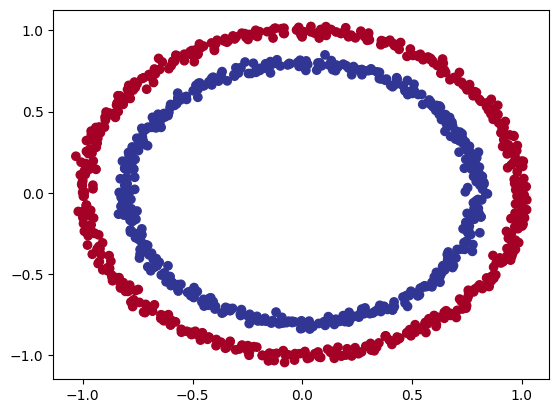

In [85]:
#exploring the circle datasets by visiualizing it
plt.scatter(Circles["X1"] , Circles["X2"] , c= y , cmap = plt.cm.RdYlBu);

Note: the data we are working with is often reffered to as toy dataset , a dataset that is samll enough to experiment but still sizeable enough to practice

1.1 Check input and output shapes

In [86]:
X.shape , y.shape

((1000, 2), (1000,))

In [87]:
X

array([[ 0.76026594,  0.22387823],
       [-0.76722217,  0.1455425 ],
       [-0.80815854,  0.14894355],
       ...,
       [-0.14123526, -0.80195115],
       [ 0.67509008, -0.75465723],
       [ 0.28237752,  0.96205688]])

In [88]:
#View the first example of features and labels

x_sample = X[0]
y_sample = y[0]

print(f"some X_sample value: {x_sample} and its y_label is : {y_sample}")
print(f" shape of some X_sample value: {x_sample.shape} and shape of y_sample_value is :{y_sample.shape}")

some X_sample value: [0.76026594 0.22387823] and its y_label is : 1
 shape of some X_sample value: (2,) and shape of y_sample_value is :()


1.2 Converting data into tensors
 - as the DataFrame provide us the values in arrays and we need to convert them into tensors to do the next processing

In [89]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [90]:
type(X) , X.dtype , y.dtype

(torch.Tensor, torch.float32, torch.float32)

1.3 Spliting the data into train/test split

In [91]:
from sklearn.model_selection import train_test_split
x_train ,x_test , y_train ,y_test = train_test_split(X,y , test_size = 0.2 , random_state = 42)

len(x_train) ,  len(y_train) ,len(x_test), len(y_test)

(800, 800, 200, 200)

# 2. Building the Model

Lets's build our model to classify red and blue dots
To do so we need to do the following :
 - set up device agnoitic Code
 -construct a model_selection
 -define loss function and the optimizer
 -create training loop and testing loop

**2.1 Device agnoistic code**

In [92]:

import torch
from torch import nn

device =  "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [93]:
x_train

tensor([[ 0.6483, -0.4748],
        [ 0.6464, -0.7356],
        [-1.0020, -0.1328],
        ...,
        [ 0.0231, -1.0198],
        [ 1.0036,  0.1621],
        [ 0.5568, -0.5727]])

**2.2 model building**

In order to create a model , we need to ddo the following steps:
- create a class which is inhereted with the base class nn.Module
- create linear layers that automatically set the random parameters values using nn.Linear
- define a forward function to do the computations in forward manner forward()
- instantitiate thr model or class and send it to the target device

In [94]:
#creating a class inherited with nn.Module to build a model
class CircleModelv0(nn.Module):
  def __init__(self):
    super().__init__()

    self.linear_layer0 = nn.Linear(in_features =2  , out_features = 5)
    self.linear_layer1 = nn.Linear(in_features = 5 , out_features = 1)

#defiining a forward method

  def forward(self , x):
    return self.linear_layer1(self.linear_layer0(x)) # x-> self.linear_layer0 -> self.linear_layer1

#instantitiate the class and setting the model to run on gpu

model_0 = CircleModelv0().to(device)

next(model_0.parameters()).device


device(type='cpu')

**Note:**
- Another method of creating a linear model is using the nn.Sequential () which automaticaly stack the linear layers and the forward computations i.e passing one input layer out to the other layer as an input

- question arise this is the simplest and easiest way then why creating the class and manually creating the layers and then doing a forward pass .The answer is for simple linear task or data nn.Sequential is perfect but when we want to cutomize the input and layers the we can define a class of the model and define a forward function to do the computations

In [95]:
# another method of creating model
#replicate the above model by nn.Sequential()

model_0 = nn.Sequential(
    nn.Linear(in_features = 2 , out_features = 5),
    nn.Linear(in_features = 5 , out_features = 1)
).to(device)

In [96]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]])),
             ('0.bias', tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370])),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]])),
             ('1.bias', tensor([-0.1213]))])

In [97]:
#Make Predictions on the untrained model
with torch.inference_mode():
  untrained_pred = model_0(x_test.to(device))

print(f" untrained predictions are : {untrained_pred[:10]}")

y_test.to(device)== (untrained_pred)

# as actual and predicted are to far from each other , In the next step we will training our model by choosing some loss function and then optimizing the parameters based on the loss

 untrained predictions are : tensor([[-0.0353],
        [-0.0358],
        [ 0.0893],
        [-0.0699],
        [ 0.2940],
        [ 0.2928],
        [ 0.1382],
        [ 0.2170],
        [ 0.0754],
        [-0.0294]])


tensor([[False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        ...,
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False]])

**2.3 Loss Function and Optimeizer**





- The selection of loss function for your model is a problem specific task .
- In case of binary classification , the most common one is Binary Cross Entropy loss
- For multi-class classification , the loss function is categorical cross entropy(cross entropy)


In [98]:
#set up the loss function
loss_fn = nn.BCEWithLogitsLoss()

#set up the optimizer
optimizer = torch.optim.SGD(params= model_0.parameters() , lr = 0.1 )

In [99]:
#calculate the accuracy in order to evaluate the model  - it means out of 100 examples , how many prediction did our model predicted correctly.
def accuracy_fn(y_true , y_pred):
  correct = torch.eq(y_true , y_pred).sum().item()
  acc = (correct / len(y_true)) *100
  return acc


# 3.Training loop and Testing loop

In order to train the model , we create a training loop , and for testing a  testing loop.

Training Loop :
- set the model in training mode
- do a forward pass
- calculate training loss
- optimizer zero grad
- back propagation
- optimizer_step

Testing loop :
- set the model in evaluation mode
- run a forward pass
- calculate testing loss
- print the information

**What are logits**

- These the raw output of the model
- we pass these raw output to the activation function to produce the prediction probabilities
- those probabilites are then rounded or converted to the formate of our actual or ground truth based on some threshold
- the threshold in many cases or by default is 0.5
  - prob>= 0.5 belongs to class 1
  - prob < 0.5 belongs to class 0

In [100]:
#training loop

torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 100

#device agoistic code
x_train , y_train = x_train.to(device) , y_train.to(device)
x_test , y_test = x_test.to(device) , y_test.to(device)

for epoch in range(epochs):

  #1. training
  model_0.train()

  #2.forward pass
  train_logits = model_0(x_train).squeeze() #the raw output of the model are called logits
  pred_prob = torch.sigmoid(train_logits) #passing the logits to sigmoid(activation) function to get prediction probablities
  pred_labels = torch.round(pred_prob) #rounding them to either zero or 1

  #3.Loss / accuracy
  #in case we have used BCEloss then we find the loss like
  #train_loss = loss_fn(pred_prob, y_test)
  train_loss = loss_fn(train_logits , y_train) #in our case we have used the BCEWithLogitsLoss which use logits as it had by-default sigmoid function in it
  train_acc =accuracy_fn(y_train , pred_labels)

  #4.optimizer zero grad
  optimizer.zero_grad()

  #5.back propagation
  train_loss.backward()

  #6.optimizer.step() to update the parameters
  optimizer.step()

  #TESTING

  #1.forward pass
  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(x_test).squeeze()
    pred_prob = torch.sigmoid(test_logits)
    test_pred = torch.round(pred_prob)


  #2. Loss function / Accuracy
  test_loss = loss_fn(test_logits , y_test)
  test_acc = accuracy_fn(y_test,test_pred)

  #3. Printing the information
  if epoch % 10 == 0:
    print(f"Epoch : {epoch} | Train_loss :{train_loss} |Train_Accuracy :{train_acc :.2f} | Test_loss {test_loss} | Test_Accuracy : {test_acc}")


Epoch : 0 | Train_loss :0.6979306936264038 |Train_Accuracy :51.75 | Test_loss 0.694434404373169 | Test_Accuracy : 57.99999999999999
Epoch : 10 | Train_loss :0.6958810687065125 |Train_Accuracy :51.25 | Test_loss 0.6930842399597168 | Test_Accuracy : 53.0
Epoch : 20 | Train_loss :0.6948915123939514 |Train_Accuracy :51.50 | Test_loss 0.6925691366195679 | Test_Accuracy : 50.5
Epoch : 30 | Train_loss :0.6943443417549133 |Train_Accuracy :51.12 | Test_loss 0.6923803091049194 | Test_Accuracy : 49.0
Epoch : 40 | Train_loss :0.6940065026283264 |Train_Accuracy :50.88 | Test_loss 0.6923316717147827 | Test_Accuracy : 51.0
Epoch : 50 | Train_loss :0.6937814354896545 |Train_Accuracy :50.38 | Test_loss 0.6923493146896362 | Test_Accuracy : 50.5
Epoch : 60 | Train_loss :0.693623423576355 |Train_Accuracy :50.25 | Test_loss 0.6924005150794983 | Test_Accuracy : 51.5
Epoch : 70 | Train_loss :0.6935088634490967 |Train_Accuracy :50.38 | Test_loss 0.6924689412117004 | Test_Accuracy : 51.5
Epoch : 80 | Train_los

#4. Make Prediction & Evaluate the Model



- From above metrics , its evident that the model is only guessing , its not learning anything.
- So to inspect this , let's make some predictions and then amke visiuals
- In other words , visiualize , visiulaize , visiualize
- To do so , we will import a function called "plot decision boundary"

In [101]:
from math import e
import requests #allaws us to make request to some website
from pathlib import Path # it allows us to  create file path

#download pytorch helper function from Learn PyTorch repo (if it's not downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists , skipping downlaod")

else:
  print("Download helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")

with open("helper_functions.py","wb") as f:
  f.write(request.content)


helper_functions.py already exists , skipping downlaod


## Plot decision boundary of the model

- ploting the training data
- ploting the testing data

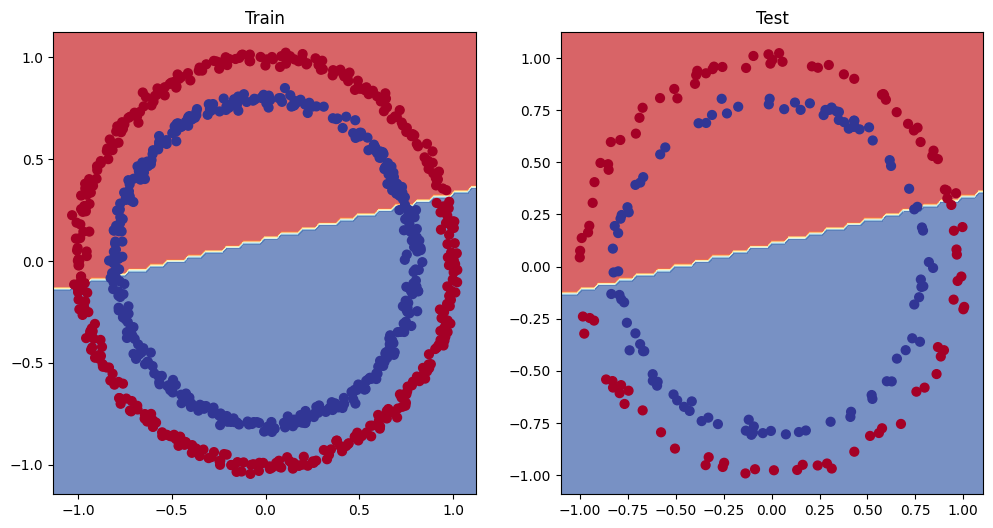

In [102]:
#import the plot_decision_boundary function from hepler_functions.py file
from helper_functions import plot_decision_boundary , plot_predictions

import matplotlib.pyplot as plt
plt.figure(figsize = (12,6))
#Traing decsion boundary
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0 , x_train , y_train)

#Testing

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0 , x_test , y_test)


# 5. Improve the Model (from medel's prespective)

**Common ways to improve a Deep Model are :**
- Adding layers
- Increase the number of hidden points
- change / add the activation function
- change the optimization function
- change the learning rate
- fitting for longer(increase epochs)

1. These model are all from the model 's prespective as they deal; directly with the model rather than data
2. These all above values are referred as hyper parameters as they are added by us .



In [103]:
class CircleModelv1(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_0 = nn.Linear(in_features = 2 , out_features = 10)
    self.layer_1 = nn.Linear(in_features = 10 , out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10 , out_features = 1)


  def forward(self , x):
    return self.layer_2(self.layer_1(self.layer_0(x)))

model_1 = CircleModelv1().to(device)
model_1.state_dict()

OrderedDict([('layer_0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer_0.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer_1.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1

In [104]:
#create a loss function
loss_fn = nn.BCEWithLogitsLoss()

#optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(),
                              lr = 0.001)

In [105]:
#training loop

torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 1000

#device agoistic code
x_train , y_train = x_train.to(device) , y_train.to(device)
x_test , y_test = x_test.to(device) , y_test.to(device)

for epoch in range(epochs):

  #1. training
  model_1.train()

  #2.forward pass
  train_logits = model_1(x_train).squeeze() #the raw output of the model are called logits
  pred_prob = torch.sigmoid(train_logits) #passing the logits to sigmoid(activation) function to get prediction probablities
  pred_labels = torch.round(pred_prob) #rounding them to either zero or 1
  #3.Loss / accuracy
  #in case we have used BCEloss then we find the loss like
  #train_loss = loss_fn(pred_prob, y_test)
  train_loss = loss_fn(train_logits , y_train) #in our case we have used the BCEWithLogitsLoss which use logits as it had by-default sigmoid function in it
  train_acc =accuracy_fn(y_train , pred_labels)

  #4.optimizer zero grad
  optimizer.zero_grad()

  #5.back propagation
  train_loss.backward()

  #6.optimizer.step() to update the parameters
  optimizer.step()

  #TESTING

  #1.forward pass
  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(x_test).squeeze()
    pred_prob = torch.sigmoid(test_logits)
    test_pred = torch.round(pred_prob)


  #2. Loss function / Accuracy
  test_loss = loss_fn(test_logits , y_test)
  test_acc = accuracy_fn(y_test,test_pred)

  #3. Printing the information
  if epoch % 100 == 0:
    print(f"Epoch : {epoch} | Train_loss :{train_loss} |Train_Accuracy :{train_acc :.2f} | Test_loss {test_loss} | Test_Accuracy : {test_acc}")


Epoch : 0 | Train_loss :0.693967878818512 |Train_Accuracy :50.75 | Test_loss 0.692600429058075 | Test_Accuracy : 51.0
Epoch : 100 | Train_loss :0.6939346790313721 |Train_Accuracy :50.88 | Test_loss 0.6926049590110779 | Test_Accuracy : 51.0
Epoch : 200 | Train_loss :0.6939034461975098 |Train_Accuracy :50.88 | Test_loss 0.6926106214523315 | Test_Accuracy : 50.5
Epoch : 300 | Train_loss :0.6938734650611877 |Train_Accuracy :50.62 | Test_loss 0.6926172375679016 | Test_Accuracy : 50.5
Epoch : 400 | Train_loss :0.6938450336456299 |Train_Accuracy :50.50 | Test_loss 0.6926248073577881 | Test_Accuracy : 51.0
Epoch : 500 | Train_loss :0.6938180327415466 |Train_Accuracy :50.62 | Test_loss 0.6926330327987671 | Test_Accuracy : 50.0
Epoch : 600 | Train_loss :0.6937921643257141 |Train_Accuracy :50.50 | Test_loss 0.6926419734954834 | Test_Accuracy : 50.5
Epoch : 700 | Train_loss :0.6937675476074219 |Train_Accuracy :50.38 | Test_loss 0.6926515102386475 | Test_Accuracy : 50.5
Epoch : 800 | Train_loss :0.

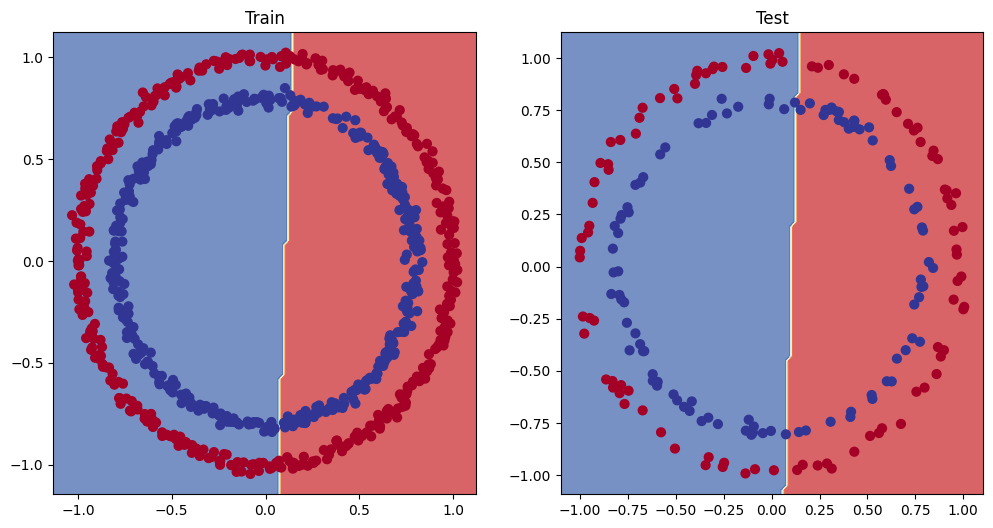

In [106]:
#import the plot_decision_boundary function from hepler_functions.py file
from helper_functions import plot_decision_boundary , plot_predictions

import matplotlib.pyplot as plt
plt.figure(figsize = (12,6))
#Traing decsion boundary
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1 , x_train , y_train)

#Testing

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1 , x_test , y_test)

# Note : still accuracy metric shows our model is not learning anything using this linear model

**what is wrong ?** we are trying to separate a non linear data using a linear model .

### checking if our model can fit a straight line or it is useless
 - preparing the data

In [107]:
#create some data

w = 0.7
b = 0.3

# we want to create a model which can estimate these numbers ( w & b)
X_reg = torch.arange(0 , 1 , 0.01).unsqueeze(dim=1)
y_reg = (w * X_reg) + b

#getting a preview of the X and y by printing first 10 values of both

X_reg[:10] , y_reg[:10]


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280],
         [0.3350],
         [0.3420],
         [0.3490],
         [0.3560],
         [0.3630]]))

In [108]:
len(X_reg)  , len(y_reg)
#so we got 100 features and 100 labels for them

(100, 100)

In [109]:
#Training split
train_split= int(0.8 * len(X_reg))
X_train_reg , y_train_reg = X_reg[:train_split] , y_reg[:train_split]
#testing split
X_test_reg , y_test_reg = X_reg[train_split:] , y_reg[train_split:]

#to confirm is the split occur correctly
len(X_train_reg) ,len(y_train_reg) , len(X_test_reg) , len(y_test_reg)


(80, 80, 20, 20)

In [110]:
from helper_functions import plot_predictions

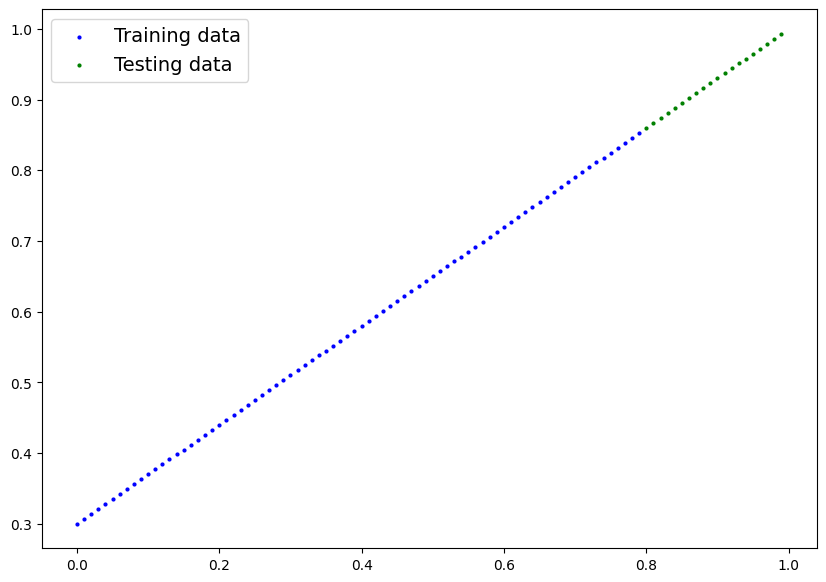

In [111]:
plot_predictions(X_train_reg , y_train_reg , X_test_reg , y_test_reg , predictions = None)

### Adjusting the model tp fit a straight line

In [112]:
  #same architecture as model_1 but using nn.Sequential

model_2 = nn.Sequential(
    nn.Linear(in_features = 1 , out_features = 10),
    nn.Linear(in_features = 10 , out_features = 10),
    nn.Linear(in_features = 10 , out_features = 1)
    ).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [113]:
#Loss And Optimizer

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_2.parameters() , lr =0.01)


In [114]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_train_reg , y_train_reg = X_train_reg.to(device) ,  y_train_reg.to(device)

X_test_reg , y_test_reg = X_test_reg.to(device) ,  y_test_reg.to(device)

epochs =1100 # epocs is the number of times our model is traversing over our data

#0. loop over the data

for epoch in range(epochs):

  #1.Training The Model
  # the train mode in PyTorch sets all the parameters that gradients requires

  model_2.train()
  #1.Do a foward pass
  y_pred = model_2(X_train_reg)

  #1.Find Loss
  loss= loss_fn(y_pred,y_train_reg)



  #3.optimizer zero grad i.e setting the optimzer 0 every time entering in the loop to avoids the accomulates which might affect the new gradiends values
  optimizer.zero_grad()

  #4.back propagation to find the gradients for each parameter
  loss.backward()

  #5.step the optimizer i.e calculate the next weight and bias value based on loss calculated
  optimizer.step()


  model_2.eval() #turn off differnt settings in the model which are not needed for testing/evaluation
  with torch.inference_mode(): # turn off gradient tracking & a couple of more things behind the scenes
    test_pred = model_2(X_test_reg)

    #calculate loss for prediction
    test_loss = loss_fn(test_pred , y_test_reg)

    #printing what is happening:
    if epoch % 100 ==0:

      print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test loss : {test_loss:.5f}")




Epoch: 0 | Loss: 0.75986 | Test loss : 0.91103
Epoch: 100 | Loss: 0.02858 | Test loss : 0.00081
Epoch: 200 | Loss: 0.02533 | Test loss : 0.00209
Epoch: 300 | Loss: 0.02137 | Test loss : 0.00305
Epoch: 400 | Loss: 0.01964 | Test loss : 0.00341
Epoch: 500 | Loss: 0.01940 | Test loss : 0.00387
Epoch: 600 | Loss: 0.01903 | Test loss : 0.00379
Epoch: 700 | Loss: 0.01878 | Test loss : 0.00381
Epoch: 800 | Loss: 0.01840 | Test loss : 0.00329
Epoch: 900 | Loss: 0.01798 | Test loss : 0.00360
Epoch: 1000 | Loss: 0.01782 | Test loss : 0.00333


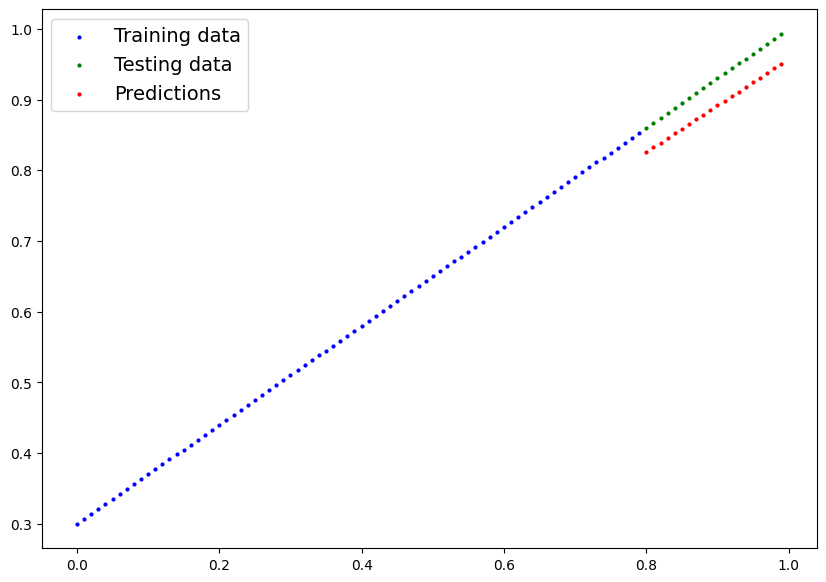

In [115]:
#Turn on prediction
model_2.eval()
with torch.inference_mode():
  y_preds = model_2(X_test_reg)


plot_predictions( X_train_reg , y_train_reg , X_test_reg , y_test_reg ,predictions = y_preds)

##**Note**: From the above observation , we noticed that our linear model do have the capacity to learn and do correct predictions but we are at fault of choosing wrong model according to this type of non linear data


In [116]:
#data

import pandas as pd
import numpy as np
import torch
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

In [117]:
X, y = make_circles(n_samples= 1000,noise = 0.02,random_state = 42)
len(X) , len(y)

(1000, 1000)

In [118]:
Circles  = pd.DataFrame({"X1": X[:,0], "X2" : X[:,1] , "lable" : y[:]})
Circles.head(10)

,X1,X2,lable
0,0.760266,0.223878,1
1,-0.767222,0.145542,1
2,-0.808159,0.148944,1
3,-0.376028,0.703209,1
4,0.440510,-0.897617,0
5,-0.484527,0.660633,1
6,-0.012450,0.802211,1
7,0.777458,0.141876,1
8,-0.166138,-0.790265,1
9,-0.126921,1.011160,0


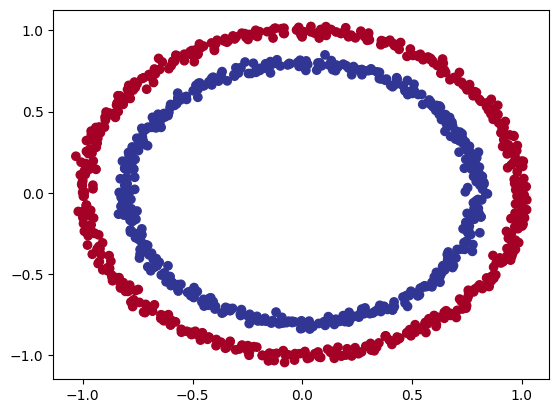

In [119]:
#exploring the circle datasets by visiualizing it
plt.scatter(Circles["X1"] , Circles["X2"] , c= y , cmap = plt.cm.RdYlBu);

In [120]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [121]:
#train/test split

from sklearn.model_selection import train_test_split
x_train ,x_test , y_train ,y_test = train_test_split(X,y , test_size = 0.2 , random_state = 42)

len(x_train) ,  len(y_train) ,len(x_test), len(y_test)

(800, 800, 200, 200)

In [122]:
#creating a class inherited with nn.Module to build a model
class CircleModelv2(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_0 = nn.Linear(in_features =2  , out_features = 10)
    self.layer_1 = nn.Linear(in_features =10  , out_features = 10)
    self.layer_2 = nn.Linear(in_features =10 , out_features = 1)
    self.relu = nn.ReLU()

#defiining a forward method

  def forward(self , x):
    return self.layer_2(self.relu(self.layer_1(self.relu(self.layer_0(x))))) # x-> self.linear_layer0 -> self.linear_layer1

#instantitiate the class and setting the model to run on gpu

model_3 = CircleModelv2().to(device)

model_3


CircleModelv2(
  (layer_0): Linear(in_features=2, out_features=10, bias=True)
  (layer_1): Linear(in_features=10, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [123]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model_3.parameters(),
                            lr = 0.1)

In [124]:
#training loop

torch.manual_seed(42)
torch.cuda.manual_seed(42)
#device agoistic code

_train , y_train = x_train.to(device) , y_train.to(device)
x_test , y_test = x_test.to(device) , y_test.to(device)


epochs = 1000
for epoch in range(epochs):

  #1. training
  model_3.train()

  #2.forward pass
  train_logits = model_3(x_train).squeeze() #the raw output of the model are called logits
  pred_prob = torch.sigmoid(train_logits) #passing the logits to sigmoid(activation) function to get prediction probablities
  pred_labels = torch.round(pred_prob) #rounding them to either zero or 1

  #3.Loss / accuracy
  #in case we have used BCEloss then we find the loss like
  #train_loss = loss_fn(pred_prob, y_test)
  train_loss = loss_fn(train_logits , y_train) #in our case we have used the BCEWithLogitsLoss which use logits as it had by-default sigmoid function in it
  train_acc =accuracy_fn(y_train , pred_labels)

  #4.optimizer zero grad
  optimizer.zero_grad()

  #5.back propagation
  train_loss.backward()

  #6.optimizer.step() to update the parameters
  optimizer.step()

  #TESTING

  #1.forward pass
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(x_test).squeeze()
    pred_prob = torch.sigmoid(test_logits)
    test_pred = torch.round(pred_prob)


  #2. Loss function / Accuracy
  test_loss = loss_fn(test_logits , y_test)
  test_acc = accuracy_fn(y_test,test_pred)

  #3. Printing the information
  if epoch % 10 == 0:
    print(f"Epoch : {epoch} | Train_loss :{train_loss} |Train_Accuracy :{train_acc :.2f} | Test_loss {test_loss} | Test_Accuracy : {test_acc}")


Epoch : 0 | Train_loss :0.6929470896720886 |Train_Accuracy :50.00 | Test_loss 0.6931266188621521 | Test_Accuracy : 50.0
Epoch : 10 | Train_loss :0.6924723982810974 |Train_Accuracy :50.00 | Test_loss 0.6925324201583862 | Test_Accuracy : 50.0
Epoch : 20 | Train_loss :0.6922397613525391 |Train_Accuracy :59.13 | Test_loss 0.6922476887702942 | Test_Accuracy : 57.49999999999999
Epoch : 30 | Train_loss :0.6920846700668335 |Train_Accuracy :70.62 | Test_loss 0.6920558214187622 | Test_Accuracy : 68.0
Epoch : 40 | Train_loss :0.69194495677948 |Train_Accuracy :68.75 | Test_loss 0.6918801665306091 | Test_Accuracy : 71.5
Epoch : 50 | Train_loss :0.6918036937713623 |Train_Accuracy :58.00 | Test_loss 0.6916963458061218 | Test_Accuracy : 59.0
Epoch : 60 | Train_loss :0.6916710734367371 |Train_Accuracy :53.75 | Test_loss 0.6915274262428284 | Test_Accuracy : 55.00000000000001
Epoch : 70 | Train_loss :0.6915434002876282 |Train_Accuracy :52.88 | Test_loss 0.6913700699806213 | Test_Accuracy : 52.5
Epoch : 8

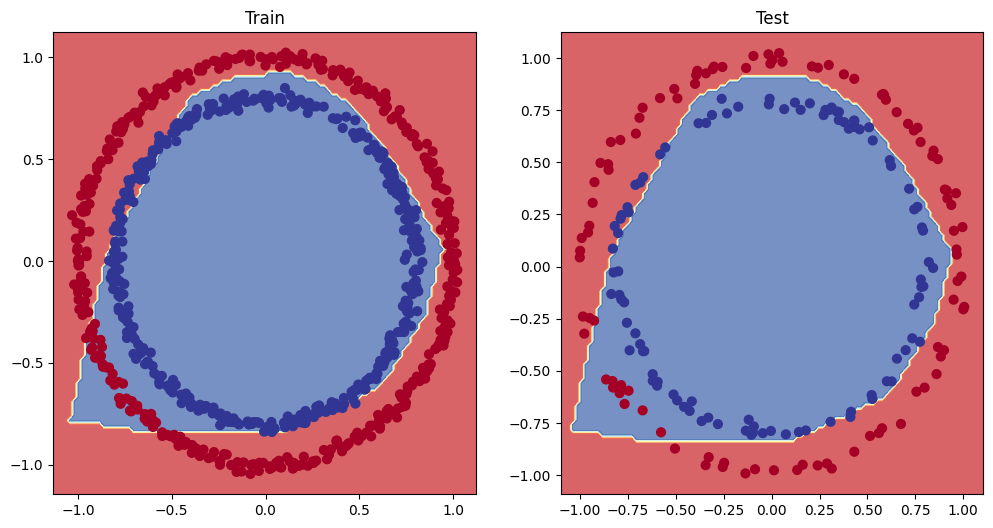

In [125]:
#import the plot_decision_boundary function from hepler_functions.py file
from helper_functions import plot_decision_boundary , plot_predictions

import matplotlib.pyplot as plt
plt.figure(figsize = (12,6))
#Traing decsion boundary
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, x_train , y_train)

#Testing

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3 , x_test , y_test)

In [126]:
#Make predictions

model_3.eval()
with torch.inference_mode():
  predictions = torch.round(torch.sigmoid(model_3(x_test))).squeeze()
predictions[:10] , y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

In [127]:
test_acc

89.0

# Neural Networks rather than us telling the model what to learn , we just provide the tools through which our model learns pattern in the data.
* These tools are linear and non - linear functions


### ReLU in action:

In [128]:
A = torch.arange(-10,10,1.0 , dtype= torch.float32)

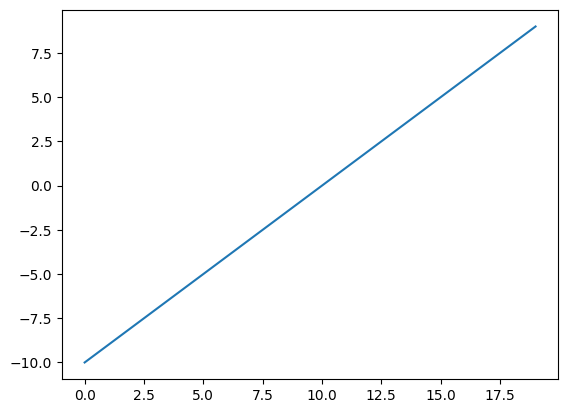

In [129]:
plt.plot(A)

In [130]:
def relu(x:torch.Tensor) -> torch.Tensor :
  return torch.maximum(torch.tensor(0),x)

print(f"Tensor A after passing through relu : {relu(A)}")
print(f"Original Tensor A  : {A}")

Tensor A after passing through relu : tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])
Original Tensor A  : tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])


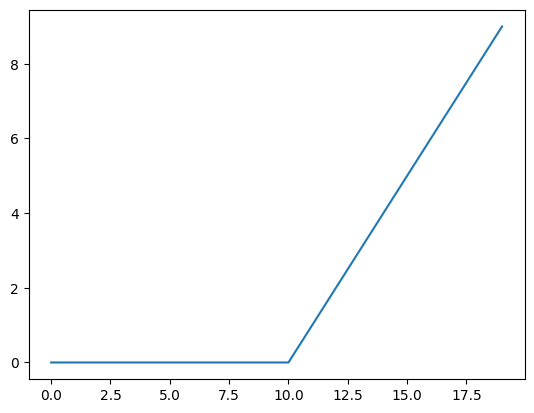

In [131]:
plt.plot(relu(A))
plt.show()

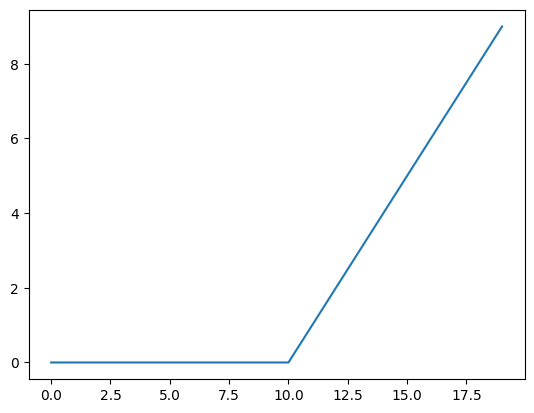

In [132]:
#original
plt.plot(torch.relu(A))

In [133]:
#Sigmoid in action- Custon Function
def sigmoid_act(x:torch.Tensor) -> torch.Tensor:
  return 1 / (1+ torch.exp(-x))

sigmoid_act(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

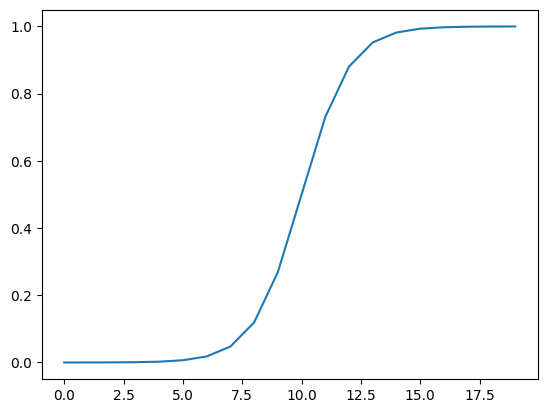

In [134]:
#custom function

plt.plot(sigmoid_act(A))
plt.show()

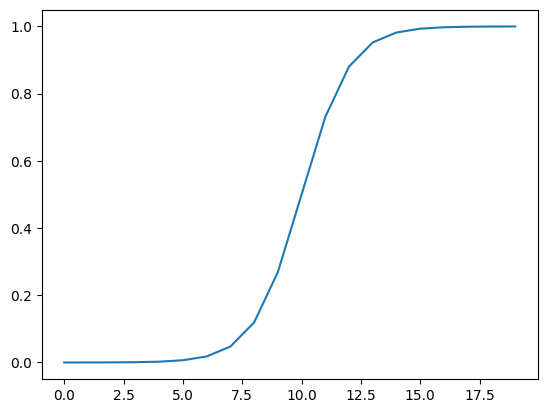

In [135]:
#original

plt.plot(torch.sigmoid(A))

# Putting it all together with Multi Class Classification

## Multi-class classification : more than two labels or classes

In [136]:
#import dependencies
import torch
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#setting hyperparameters
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

 # **Data**

In [137]:
x_blobs , y_blobs = make_blobs(n_samples = 1000,
                              n_features = NUM_FEATURES ,
                              centers = NUM_CLASSES ,
                              cluster_std = 1.5,
                              random_state = RANDOM_SEED)

x_blobs[0:10] , y_blobs[0:10]


(array([[-8.41339595,  6.93516545],
        [-5.76648413, -6.43117072],
        [-6.04213682, -6.76610151],
        [ 3.95083749,  0.69840313],
        [ 4.25049181, -0.28154475],
        [-6.7941075 , -6.47722117],
        [ 5.21017561,  2.8890483 ],
        [-5.50513568, -6.36037688],
        [-6.54375599, -4.83389895],
        [ 6.44964229,  0.74776618]]),
 array([3, 2, 2, 1, 1, 2, 1, 2, 2, 1]))

In [138]:
#converting numpy arrays to tensor
x_blobs = torch.from_numpy(x_blobs).type(torch.float)
y_blobs = torch.from_numpy(y_blobs).type(torch.LongTensor)

In [139]:
x_blobs[0:10] , y_blobs[0:10]

(tensor([[-8.4134,  6.9352],
         [-5.7665, -6.4312],
         [-6.0421, -6.7661],
         [ 3.9508,  0.6984],
         [ 4.2505, -0.2815],
         [-6.7941, -6.4772],
         [ 5.2102,  2.8890],
         [-5.5051, -6.3604],
         [-6.5438, -4.8339],
         [ 6.4496,  0.7478]]),
 tensor([3, 2, 2, 1, 1, 2, 1, 2, 2, 1]))

# **Train/Test Split**

In [140]:
x_blob_train , x_blob_test , y_blob_train , y_blob_test = train_test_split(x_blobs , y_blobs , random_state = 42 , test_size = 0.2)

 # **Data Exploration - Visiualization**

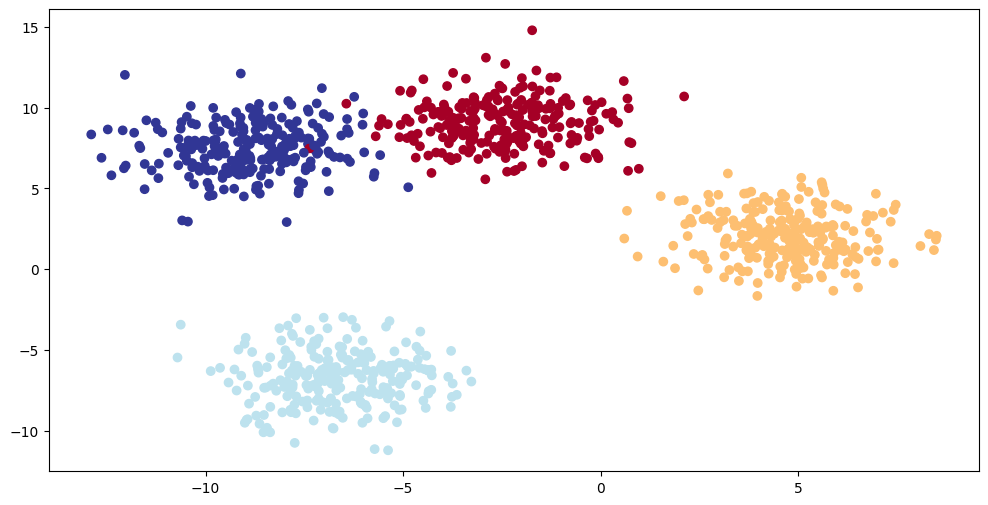

In [141]:
#exploring the data y visiulaizing it
plt.figure(figsize = (12,6))
plt.scatter(x_blobs[:,0] , x_blobs[:,1] ,c=y_blobs ,cmap = plt.cm.RdYlBu )
plt.show()

# **Building a multiclass classification maodel in PyTorch**

### Hyperparameters that will be used :
 - Input layer shape
 - Hidden Layers
 - Neurons per hidden layer
 - Output layer shape
 - Hidden layer activation
 - Output activation
 - Loss Function
 - Optimizer

In [142]:
#writing device agnoistic code
device =  "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [143]:
import torch.nn as nn

class BlobModel(nn.Module):
  def __init__(self, in_features, out_features, hidden_units=8):
    super().__init__()
    self.stack_linear_layers = nn.Sequential(
      nn.Linear(in_features, hidden_units),
      nn.ReLU(),
      nn.Linear(hidden_units, hidden_units),
      nn.ReLU(),
      nn.Linear(hidden_units, out_features)
    )

  def forward(self, x):
    return self.stack_linear_layers(x)

model_4 = BlobModel(2,4,8)
model_4


BlobModel(
  (stack_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

# **Loss Function and Optimizer**

In [144]:
#setting up the loss
loss_fn = nn.CrossEntropyLoss()

#setting up the optimizer
optimizer = torch.optim.SGD(params = model_4.parameters() ,lr = 0.1)


# **Training loop and Testing loop**

logits -> predictions probabilities ->prediction labels

In [145]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#setting the device
x_blob_train  ,  y_blob_train = x_blob_train.to(device) , y_blob_train.to(device)

x_blob_test ,  y_blob_test = x_blob_test.to(device) , y_blob_test.to(device)

#setting up the epochs
epochs = 100
for epoch in range(epochs):
  #training loop
  model_4.train()

  #forward pass
  train_logits = model_4(x_blob_train)
  train_pred_prob = torch.softmax(train_logits, dim=1).argmax(dim = 1)


  #loss function /accuracy
  train_loss = loss_fn(train_logits , y_blob_train)
  train_acc = accuracy_fn(y_blob_train , train_pred_prob)

  #optimizer zero grad
  optimizer.zero_grad()

  #backpropagation
  train_loss.backward()

  #optimizer step
  optimizer.step()

  #testing loop
  model_4.eval()
  with torch.inference_mode():
    #forward pass
    test_logits = model_4(x_blob_test)
    test_pred_prob = torch.softmax(test_logits, dim = 1).argmax(dim = 1)


    #loss function /accuracy
    test_loss = loss_fn(test_logits , y_blob_test)
    test_acc = accuracy_fn(y_blob_test , test_pred_prob)

    # print out what 's happening
    if epoch % 10 ==0 :
      print(f"Epoch : {epoch} | Train_loss : {train_loss} | Train_Accuracy : {train_acc} | Test_Loss : {test_loss} | Test_Accuracy : {test_acc}")




Epoch : 0 | Train_loss : 1.1588267087936401 | Train_Accuracy : 40.375 | Test_Loss : 1.0755422115325928 | Test_Accuracy : 48.0
Epoch : 10 | Train_loss : 0.6447553038597107 | Train_Accuracy : 96.75 | Test_Loss : 0.660687267780304 | Test_Accuracy : 97.5
Epoch : 20 | Train_loss : 0.4253515303134918 | Train_Accuracy : 98.5 | Test_Loss : 0.43074119091033936 | Test_Accuracy : 100.0
Epoch : 30 | Train_loss : 0.2529422640800476 | Train_Accuracy : 99.125 | Test_Loss : 0.24507610499858856 | Test_Accuracy : 99.5
Epoch : 40 | Train_loss : 0.11232147365808487 | Train_Accuracy : 99.25 | Test_Loss : 0.10228512436151505 | Test_Accuracy : 99.5
Epoch : 50 | Train_loss : 0.06626509130001068 | Train_Accuracy : 99.25 | Test_Loss : 0.058475371450185776 | Test_Accuracy : 99.5
Epoch : 60 | Train_loss : 0.05068016052246094 | Train_Accuracy : 99.25 | Test_Loss : 0.042932283133268356 | Test_Accuracy : 99.5
Epoch : 70 | Train_loss : 0.04299675300717354 | Train_Accuracy : 99.25 | Test_Loss : 0.034909654408693314 | 

In [146]:
with torch.inference_mode():
  y_preds = torch.softmax(model_4(x_blob_test) , dim=1).argmax(dim = 1)

y_preds

accuracy_fn(y_blob_test,y_preds)

99.5

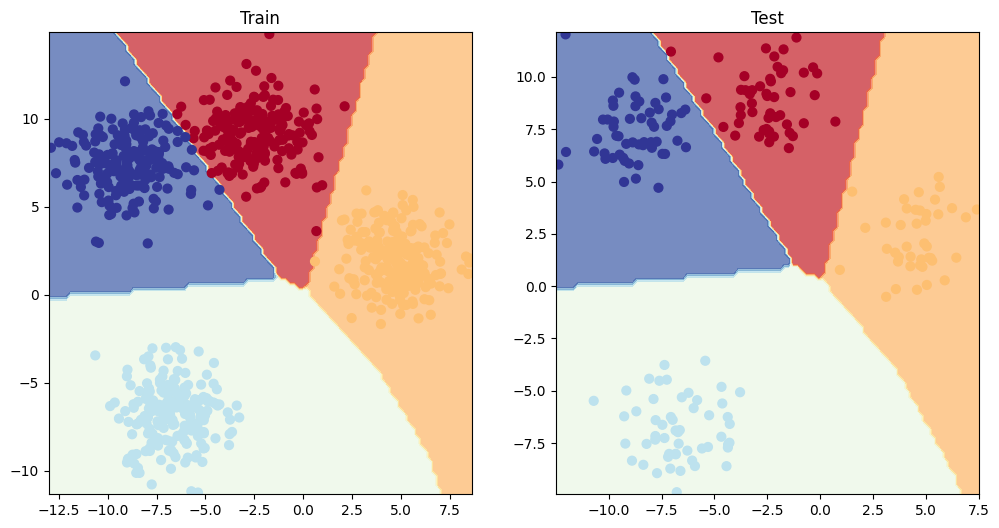

In [147]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4 , x_blob_train , train_pred_prob)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4 , x_blob_test , test_pred_prob)

# Different Evaluation Metrices For Classification Problems:
1.Accuracy

2.Precision

3.Recall

4.F1-Score

5.Confusion Matrix

6.Classification Report

**Accuracy:**

- default classification metric for evaluating the model's performance
- out of 100 examples , how many examples were predicted correctly by our model
- tf+tn / (tp+fp+tn+fn)
- torchmetrics.Accuracy() or sklearn.metrics.accuracy_score()
- not good for imabalnced datasets

**Precision:**
- tp/ (tp + fp)
- torchmetrics.Precision() or sklearn.metrics.precision_score()
- Higher precision leads to less false positives

**Recall**
- tp / (tp+fn)
- torchmetrics.Recall() or sklearn.metrics.recall_score()
- Higher recall leads to the false negatives

**F1-Score**
- combination of precision and recall, usually a good overall metric for a classification model
- 2*(precision * recall)/(precision + recall)
- torchmetrics.F1Score() or sklearn.metrics.f1_score()

**Confusion Matrix**
- torchmetrics.ConfusionMatrix()
- When comparing predictions to truth labels to see where models gets confused.Can be hard to use with large number of classes

In [148]:
!pip install torchmetrics

In [149]:
from torchmetrics.classification import Accuracy

In [158]:
torchmetric_accuracy = Accuracy( task ="multiclass" , num_classes = 4).to(device)

In [159]:
torchmetric_accuracy(y_blob_test , y_preds)

tensor(0.9950)